In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import geopandas as gpd

# Data

In [3]:
# report data
report_df = pd.read_csv('data/ufo_df.csv', index_col=0)
report_df.head()

,datetime,geolocation,season,month,day,time_of_day,region,shape,duration,report_text
report_id,,,,,,,,,,
073/S73909,2010-01-01 00:00:00,"Park City, KY",Winter,January,Friday,Night,East South Central,Light,3.0,"Lights orbiting the moon,I am 10,and i was wit..."
073/S73915,2010-01-01 00:00:00,"La Mesa, CA",Winter,January,Friday,Night,Pacific,Light,600.0,Three red lights over southern California that...
078/S78231,2010-01-01 00:00:00,"Benton, AR",Winter,January,Friday,Night,West South Central,Circle,300.0,4 bright green circles high in the sky going i...
073/S73918,2010-01-01 00:00:00,"El Cajon, CA",Winter,January,Friday,Night,Pacific,Triangle,720.0,"3 Red objects hovering over El Cajon CA ,Exit..."
073/S73916,2010-01-01 00:00:00,"Lemon Grove, CA",Winter,January,Friday,Night,Pacific,Light,900.0,3 Red lights in line pattern above El Cajon/ E...


In [4]:
# city location data
city_df = pd.read_csv('data/simplemaps_uscities_basicv1.6/uscities_2019-09.csv')
city_df.head()

,city,city_ascii,state_id,state_name,county_fips,county_name,county_fips_all,county_name_all,lat,lng,population,density,source,military,incorporated,timezone,ranking,zips,id
0,South Creek,South Creek,WA,Washington,53053,Pierce,53053,Pierce,46.9994,-122.3921,2500.0,125.0,polygon,False,True,America/Los_Angeles,3,98580 98387 98338,1840042075
1,Roslyn,Roslyn,WA,Washington,53037,Kittitas,53037,Kittitas,47.2507,-121.0989,947.0,84.0,polygon,False,True,America/Los_Angeles,3,98941 98068 98925,1840019842
2,Sprague,Sprague,WA,Washington,53043,Lincoln,53043,Lincoln,47.3048,-117.9713,441.0,163.0,polygon,False,True,America/Los_Angeles,3,99032,1840021107
3,Gig Harbor,Gig Harbor,WA,Washington,53053,Pierce,53053,Pierce,47.3352,-122.5968,9507.0,622.0,polygon,False,True,America/Los_Angeles,3,98332 98335,1840019855
4,Lake Cassidy,Lake Cassidy,WA,Washington,53061,Snohomish,53061,Snohomish,48.0639,-122.0920,3591.0,131.0,polygon,False,True,America/Los_Angeles,3,98223 98258 98270,1840041959


In [5]:
# county shapefile data
county_df = gpd.read_file('data/cb_2018_us_county_500k/cb_2018_us_county_500k.shp')
county_df.head()

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
0,21,007,00516850,0500000US21007,21007,Ballard,06,639387454,69473325,"POLYGON ((-89.18137 37.04630, -89.17938 37.053..."
1,21,017,00516855,0500000US21017,21017,Bourbon,06,750439351,4829777,"POLYGON ((-84.44266 38.28324, -84.44114 38.283..."
2,21,031,00516862,0500000US21031,21031,Butler,06,1103571974,13943044,"POLYGON ((-86.94486 37.07341, -86.94346 37.074..."
3,21,065,00516879,0500000US21065,21065,Estill,06,655509930,6516335,"POLYGON ((-84.12662 37.64540, -84.12483 37.646..."
4,21,069,00516881,0500000US21069,21069,Fleming,06,902727151,7182793,"POLYGON ((-83.98428 38.44549, -83.98246 38.450..."


## Reports by County

In [89]:
# filter city data by report geolocations
geo_pop = pd.DataFrame({
    'geolocation': city_df['city'] + ', ' + city_df['state_id'], 
    'population': city_df['population'],
    'county_id': city_df['county_fips'],
    'latitude': city_df['lat'],
    'longitude': city_df['lng']
})
geo_pop.set_index('geolocation', inplace=True)
# filter based on report geolocations
geo_pop = geo_pop[geo_pop.index.isin(report_df['geolocation'].unique())]
geo_pop.head()

,population,county_id,latitude,longitude
geolocation,,,,
"Gig Harbor, WA",9507.0,53053,47.3352,-122.5968
"Tenino, WA",1830.0,53067,46.8537,-122.8607
"Parkland, WA",37019.0,53053,47.1417,-122.4376
"Birch Bay, WA",8642.0,53073,48.9230,-122.7543
"Omak, WA",8130.0,53047,48.4228,-119.5159


In [90]:
# report counts grouped by geoloation
geo_counts = report_df.groupby('geolocation').count()[['report_text']].join(geo_pop)
geo_counts.head()

,report_text,population,county_id,latitude,longitude
geolocation,,,,,
"Abbeville, LA",3,19848.0,22113,29.9750,-92.1266
"Abbott, TX",1,363.0,48217,31.8870,-97.0800
"Aberdeen Gardens, WA",1,283.0,53027,47.0587,-123.7791
"Aberdeen, MD",7,16049.0,24025,39.5146,-76.1730
"Aberdeen, NC",2,7625.0,37125,35.1351,-79.4319


In [91]:
# average counts by county
county_counts = geo_counts.groupby('county_id').sum()[['report_text']]
# re-format county id to 5-character string
county_counts.index = [str(x).zfill(5) for x in county_counts.index]
county_counts.head()

,report_text
01001,2
01003,44
01005,4
01007,2
01009,5


In [92]:
# join data into shapefile
county_plot = county_df.set_index('GEOID').join(county_counts)
county_plot['report_text'].fillna(0, inplace=True)
county_plot.head()

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,NAME,LSAD,ALAND,AWATER,geometry,report_text
GEOID,,,,,,,,,,
21007,21,007,00516850,0500000US21007,Ballard,06,639387454,69473325,"POLYGON ((-89.18137 37.04630, -89.17938 37.053...",2.0
21017,21,017,00516855,0500000US21017,Bourbon,06,750439351,4829777,"POLYGON ((-84.44266 38.28324, -84.44114 38.283...",4.0
21031,21,031,00516862,0500000US21031,Butler,06,1103571974,13943044,"POLYGON ((-86.94486 37.07341, -86.94346 37.074...",0.0
21065,21,065,00516879,0500000US21065,Estill,06,655509930,6516335,"POLYGON ((-84.12662 37.64540, -84.12483 37.646...",2.0
21069,21,069,00516881,0500000US21069,Fleming,06,902727151,7182793,"POLYGON ((-83.98428 38.44549, -83.98246 38.450...",0.0


In [93]:
# filter out territories, Alaska and Hawaii
excl_list = ['02', '15', '60', '66', '69', '72', '78']
county_plot = county_plot[~county_plot['STATEFP'].isin(excl_list)].copy()

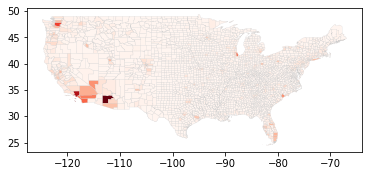

In [78]:
# create choropleth plot
county_plot.plot(column='report_text', cmap='Reds', linewidth=0.2, edgecolor='0.8');

## State

In [99]:
state_id = '48'

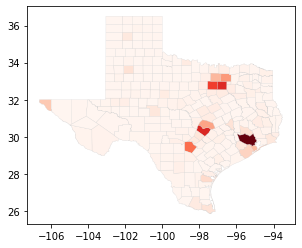

In [100]:
county_plot[county_plot['STATEFP'] == state_id].plot(
    column='report_text', 
    cmap='Reds', 
    linewidth=0.2, 
    edgecolor='0.8'
);

## Reports Normalized by Population

In [79]:
# filter city data by report geolocations
geo_pop = pd.DataFrame({
    'geolocation': city_df['city'] + ', ' + city_df['state_id'], 
    'population': city_df['population'],
    'county_id': city_df['county_fips'],
    'latitude': city_df['lat'],
    'longitude': city_df['lng']
})
geo_pop.set_index('geolocation', inplace=True)
# filter based on report geolocations
geo_pop = geo_pop[geo_pop.index.isin(report_df['geolocation'].unique())]
geo_pop.head()

,population,county_id,latitude,longitude
geolocation,,,,
"Gig Harbor, WA",9507.0,53053,47.3352,-122.5968
"Tenino, WA",1830.0,53067,46.8537,-122.8607
"Parkland, WA",37019.0,53053,47.1417,-122.4376
"Birch Bay, WA",8642.0,53073,48.9230,-122.7543
"Omak, WA",8130.0,53047,48.4228,-119.5159


In [80]:
# report counts grouped by geoloation with population
geo_counts = report_df.groupby('geolocation').count()[['report_text']].join(geo_pop)
# fill pop 0 to 1
geo_counts['population'] = geo_counts['population'].replace(0, 1)
# report counts weighted by geolocation population
geo_counts['norm_count'] = geo_counts['report_text'] / (geo_counts['population'])
geo_counts.head()

,report_text,population,county_id,latitude,longitude,norm_count
geolocation,,,,,,
"Abbeville, LA",3,19848.0,22113,29.9750,-92.1266,0.000151
"Abbott, TX",1,363.0,48217,31.8870,-97.0800,0.002755
"Aberdeen Gardens, WA",1,283.0,53027,47.0587,-123.7791,0.003534
"Aberdeen, MD",7,16049.0,24025,39.5146,-76.1730,0.000436
"Aberdeen, NC",2,7625.0,37125,35.1351,-79.4319,0.000262


In [81]:
# average counts by county
county_counts = geo_counts.groupby('county_id').mean()[['norm_count']]
# re-format county id to 5-character string
county_counts.index = [str(x).zfill(5) for x in county_counts.index]
county_counts.head()

,norm_count
01001,0.000056
01003,0.000512
01005,0.000511
01007,0.000214
01009,0.000631


In [82]:
# join data into shapefile
county_plot = county_df.set_index('GEOID').join(county_counts)
county_plot['norm_count'].fillna(0, inplace=True)
county_plot.head()

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,NAME,LSAD,ALAND,AWATER,geometry,norm_count
GEOID,,,,,,,,,,
21007,21,007,00516850,0500000US21007,Ballard,06,639387454,69473325,"POLYGON ((-89.18137 37.04630, -89.17938 37.053...",0.001580
21017,21,017,00516855,0500000US21017,Bourbon,06,750439351,4829777,"POLYGON ((-84.44266 38.28324, -84.44114 38.283...",0.000747
21031,21,031,00516862,0500000US21031,Butler,06,1103571974,13943044,"POLYGON ((-86.94486 37.07341, -86.94346 37.074...",0.000000
21065,21,065,00516879,0500000US21065,Estill,06,655509930,6516335,"POLYGON ((-84.12662 37.64540, -84.12483 37.646...",0.000660
21069,21,069,00516881,0500000US21069,Fleming,06,902727151,7182793,"POLYGON ((-83.98428 38.44549, -83.98246 38.450...",0.000000


In [83]:
# filter out territories, Alaska and Hawaii
excl_list = ['02', '15', '60', '66', '69', '72', '78']
county_plot = county_plot[~county_plot['STATEFP'].isin(excl_list)].copy()

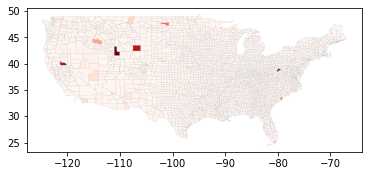

In [84]:
# create chloropleth plot
county_plot.plot(column='norm_count', cmap='Reds', linewidth=0.2, edgecolor='0.8');

# OLD

In [ ]:
# read in city coordinates dataframe
geo_cities = pd.read_csv('data/simplemaps_uscities_basicv1.6/uscities_2019-09.csv', 
                         usecols=['city', 'state_id', 'lat', 'lng', 'population'])
geo_cities.head()

In [ ]:
# list of cities
geo_locs = geo_cities['city'] + ', ' + geo_cities['state_id']

In [ ]:
# combine data with location coordinates
mrg_df = pd.merge(ufo_df, geo_cities, left_on=['city', 'state'], right_on=['city', 'state_id'])
mrg_df.head()

In [ ]:
# group by cities
city_df = mrg_df.groupby(by=['lat', 'lng']).count()
city_df.head()

## Heat Map

In [ ]:
import folium
from folium.plugins import HeatMap

In [ ]:
lats = city_df.index.get_level_values('lat')
longs = city_df.index.get_level_values('lng')
num_site = city_df['geolocation']
max_num = city_df['geolocation'].max()

In [ ]:
hm_wide = HeatMap( list(zip(lats, longs, num_site)),
                   min_opacity=0.5,
                   max_val=max_num,
                   radius=17, blur=15, 
                   max_zoom=1, 
                 )

In [ ]:
hmap = folium.Map(location=[38, -98], zoom_start=4, )

In [ ]:
hmap.add_child(hm_wide)

In [ ]:
# save heat map
# hmap.save('heatmap.html')